<a href="https://colab.research.google.com/github/majetikalyan007/ML-algorithms/blob/main/two_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. Create synthetic dataset with 2 features
torch.manual_seed(42)
X = torch.randn(50, 2)  # Shape: (50 samples, 2 features)
# Generate y with some linear combination of the features plus bias
y = 3.5 * X[:, 0] - 2.0 * X[:, 1] + 7

In [ ]:
# 2. Define Model (2 input features, 1 output neuron)
model = nn.Linear(in_features=2, out_features=1)  # y = w1*x1 + w2*x2 + b

# 3. Define Loss & Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# 4. Training Loop
epochs = 100
loss_history = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if (epoch + 1) % 10 == 0:
        w, b = model.parameters()
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}, w = {w.squeeze().tolist()}, b = {b.item():.4f}")


Epoch 10: Loss = 42.4971, w = [-0.04895295947790146, -0.23952029645442963], b = 0.8742
Epoch 20: Loss = 32.3694, w = [-0.15626025199890137, 0.022401627153158188], b = 1.8192
Epoch 30: Loss = 26.0039, w = [-0.22503043711185455, 0.19584901630878448], b = 2.5790
Epoch 40: Loss = 21.9603, w = [-0.26564285159111023, 0.3050532341003418], b = 3.1920
Epoch 50: Loss = 19.3614, w = [-0.28594428300857544, 0.36813414096832275], b = 3.6881
Epoch 60: Loss = 17.6697, w = [-0.291841059923172, 0.3985813856124878], b = 4.0909
Epoch 70: Loss = 16.5537, w = [-0.28775519132614136, 0.40638357400894165], b = 4.4191
Epoch 80: Loss = 15.8074, w = [-0.2769761383533478, 0.39888912439346313], b = 4.6875
Epoch 90: Loss = 15.3015, w = [-0.2619309723377228, 0.38146132230758667], b = 4.9077
Epoch 100: Loss = 14.9539, w = [-0.2443922907114029, 0.3579757511615753], b = 5.0889


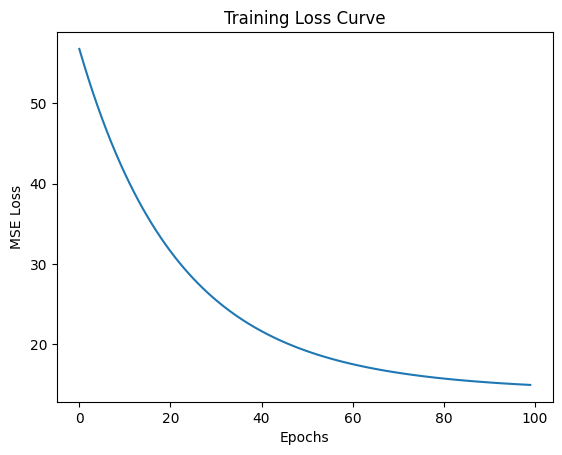

In [ ]:
# 5. Plot Loss Curve
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.show()

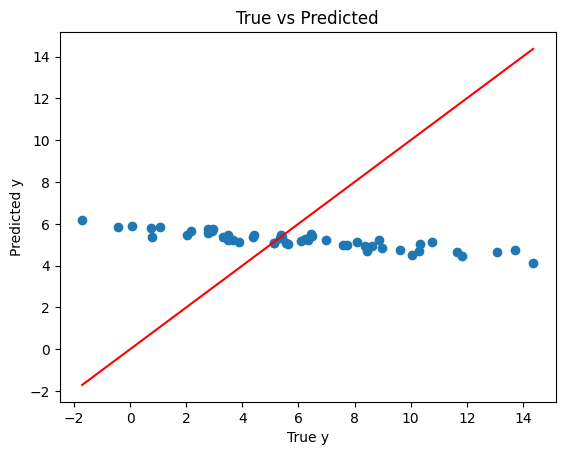

Final model: y = [-0.2443922907114029, 0.3579757511615753] * x + 5.0889


In [ ]:
# 6. Since it's 2D input, can't plot regression line easily. Instead, print predictions vs true.
predicted = model(X).detach()
plt.scatter(y.numpy(), predicted.numpy())
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("True vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Diagonal line
plt.show()

# 7. Print final parameters
w, b = model.parameters()
print(f"Final model: y = {w.squeeze().tolist()} * x + {b.item():.4f}")
